Grupo 1

Obed Felipe Espinosa Angarita

Karen Tatiana Alvarez Baez

Paula Liliana Olaya Oyola

# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [35]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    x = x0  # Initial value
    niter = 0  # Iteration counter

    while True:
        fx = f(x)
        fpx = fder(x)

        if abs(fx) < eps or niter >= maxiter:
            break

        x -= fx / fpx  # Newton's iteration formula
        niter += 1

    return x, niter

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [36]:
# ... ENTER YOUR CODE HERE ...
f = lambda x: x**2 - 1
fder = lambda x: 2*x

root, niter = newton_iteration(f, fder, 0.075)
print("Root =", root)
print("Number of iterations =", niter)

Root = 1.0000000088488812
Number of iterations = 7


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [37]:
# ... ENTER YOUR CODE HERE ...
def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):
    """Find a root of f(x) = 0 via modified Newton's iteration starting from x0 with parameter m.

    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the modified Newton's iteration.
    m : int
        The parameter m for modified Newton's iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = x0  # Initial value
    niter = 0  # Iteration counter

    while True:
        fx = f(x)
        fpx = fder(x)

        if abs(fx) < eps or niter >= maxiter:
            break

        x -= m * fx / fpx  # Modified Newton's iteration formula
        niter += 1

    return x, niter

In [38]:
x0 = 10
eps = 1e-5
maxiter = 1000

# Varying m values
m_values = [1, 2, 3, 4, 5]

# Perform iteration and check convergence behavior
for m in m_values:
    root, niter = modified_newton_iteration(f, fder, x0, m, eps, maxiter)
    print(f"For m = {m}:")
    print(f"Root = {root}")
    print(f"Number of iterations = {niter}")
    print("---")

For m = 1:
Root = 1.0000000000139897
Number of iterations = 7
---
For m = 2:
Root = 10.000000000000036
Number of iterations = 1000
---
For m = 3:
Root = -5.151829003437761
Number of iterations = 1000
---
For m = 4:
Root = -3869.8491861516327
Number of iterations = 1000
---
For m = 5:
Root = nan
Number of iterations = 1000
---


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

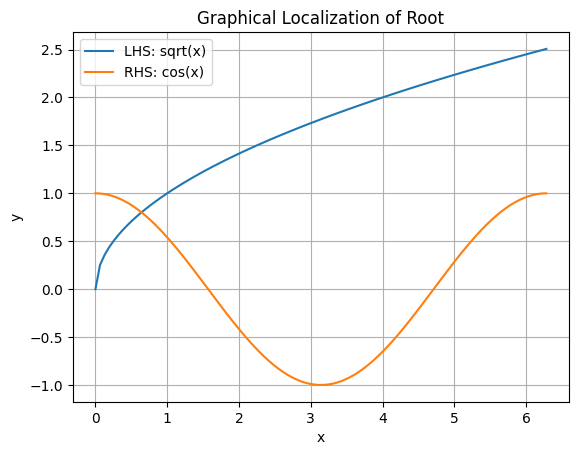

In [39]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
f_lhs = lambda x: np.sqrt(x)
f_rhs = lambda x: np.cos(x)

# Generate x values for plotting
x = np.linspace(0, 2*np.pi, 100)

# Plot the functions
plt.plot(x, f_lhs(x), label='LHS: sqrt(x)')
plt.plot(x, f_rhs(x), label='RHS: cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphical Localization of Root')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
def fixed_point_iteration(g, x0, eps=1e-5, maxiter=1000):
    """Find a solution to g(x) = x via fixed-point iteration starting from x0.

    Parameters
    ----------
    g : callable
        The function to find a fixed point of.
    x0 : float
        Initial value for the fixed-point iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000).
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the fixed point.
    niter : int
        The number of iterations.
    """
    x = x0  # Initial value
    niter = 0  # Iteration counter

    while True:
        x_new = g(x)  # Perform the fixed-point iteration

        if abs(x_new - x) < eps or niter >= maxiter:
            break

        x = x_new
        niter += 1

    return x, niter

# Function definition for the fixed-point iteration
g = lambda x: np.cos(x)**2

# Initial value and target accuracy
x0 = 0.5
eps = 1e-5

# Perform fixed-point iteration
root, niter = fixed_point_iteration(g, x0, eps)

print("Estimated root by fixed-point iteration:", root)
print("Number of iterations:", niter)


Estimated root by fixed-point iteration: 0.6417192912275143
Number of iterations: 241


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

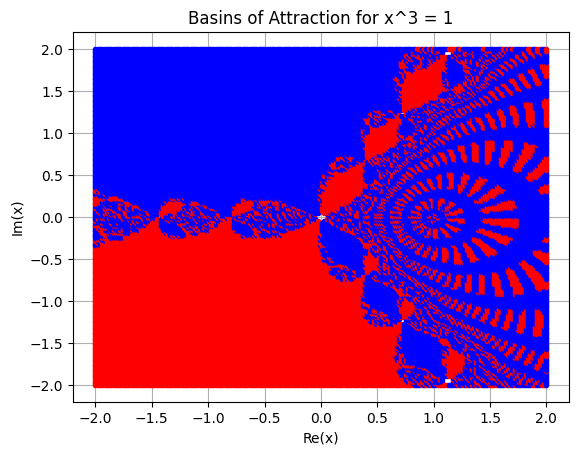

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

def newton_iterations_converged(x0):
    eps = 1e-5
    maxiter = 1000
    x = x0 - (x0**3-1)/(3*x0**2)
    niter = x0

    for _ in range(maxiter):
        if abs(x-niter) <= eps:
            break

        if abs(x-niter) > 1e2:
            return 0

        niter = x
        x = x - ((x**3-1) / (3*x**2))

    if abs(x-cmath.exp(complex(0, 2*np.pi*1/3))) < abs(x-cmath.exp(complex(0, 2*np.pi*2/3))):
        return 1
    else:
        return 2

x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)

colors = ['blue', 'red']

for x0 in x:
    for y0 in y:
        fr = newton_iterations_converged(complex(x0, y0))
        if fr > 0:
            plt.plot(x0, y0, marker='o', markersize=3, color=colors[fr-1])

roots_x = []
roots_y = []
for i in range(3):
    z = cmath.exp(complex(0, 2*np.pi*i/3))
    roots_x.append(z.real)
    roots_y.append(z.imag)

plt.scatter(roots_x, roots_y, c='g')
plt.xlabel('Re(x)')
plt.ylabel('Im(x)')
plt.title("Basins of Attraction for x^3 = 1")
plt.grid(True)
plt.show()
